In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from google.colab.patches import cv2_imshow # cv2_imshow
from IPython.display import HTML
from base64 import b64encode

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


definir o caminho da pasta onde serão armazenados e buscados os arquivos

In [4]:
pathOrigin = '/content/drive/My Drive/processamento-de-video/'

Nessa primeira secção desenvolveremos algumas funções que servirão de utilitários ao decorrer do código.




In [5]:
def openImageCv(fileName, param = "NULL"):
  # Caminho completo da imagem
  pathImage = pathOrigin + fileName
  # Função 'imread' da biblioteca 'cv' para realizar a leitura da imagem à partir de seu arquivo

  if param == "NULL":
    return cv.imread(pathImage)

  return cv.imread(pathImage, param)

Para alterar o tamanho da imagem criamos uma função que recebe um fator de escala e muda a imagem mantendo suas proporções.



In [18]:
def resizeImage(img, factor):
  sqrtFactor = Math.sqrt(factor)
  return cv.resize(img, None, fx=sqrtFactor, fy=sqrtFactor)

**a) Apresentem as imagens originais e as versões em P&B delas**



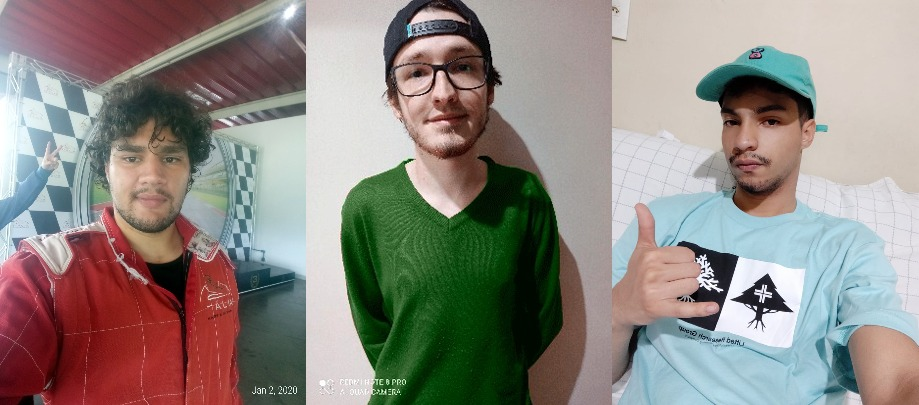

In [7]:
#Exibição das imagem dos integrantes

imgIntegrante = openImageCv('grupo-rgb.jpg')
cv2_imshow(imgIntegrante)

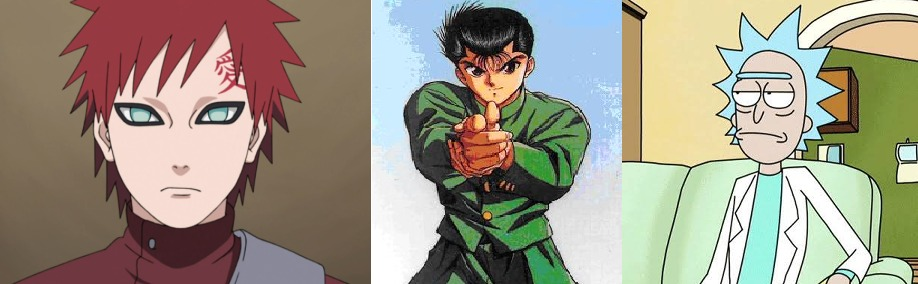

In [10]:
#Apresentação dos Avatares
imgAvatar = openImageCv('grupo-avatar-rgb.jpg')
cv2_imshow(imgAvatar)


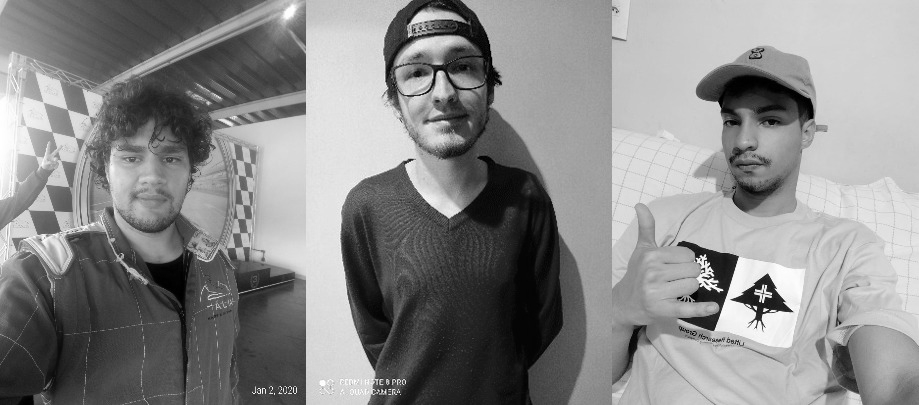

In [11]:
# Exibição dos integrantes em Preto e Branco

imgIntegrante = openImageCv('grupo-rgb.jpg', cv.IMREAD_GRAYSCALE)
cv2_imshow(imgIntegrante)

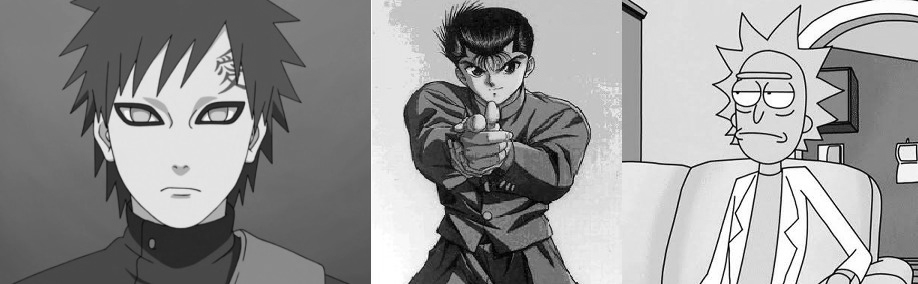

In [12]:
# Exibição dos Avatares em Preto e Branco

imgAvatar = openImageCv('grupo-avatar-rgb.jpg', cv.IMREAD_GRAYSCALE)
cv2_imshow(imgAvatar)

# **b) Apresentem as imagens com duas resoluções diferentes cada**

Para o bloco de código abaixo, foram realizadas as seguintes ações, repetidas para cada imagem de integrante:



1.   Realizada a leitura da imagem.
2.   Feito o primeiro 'resize' da imagem e display da mesma.
3.   Feito o segundo 'resize' e display, em outra resolução.



A imagem original tem: 372195 pixels


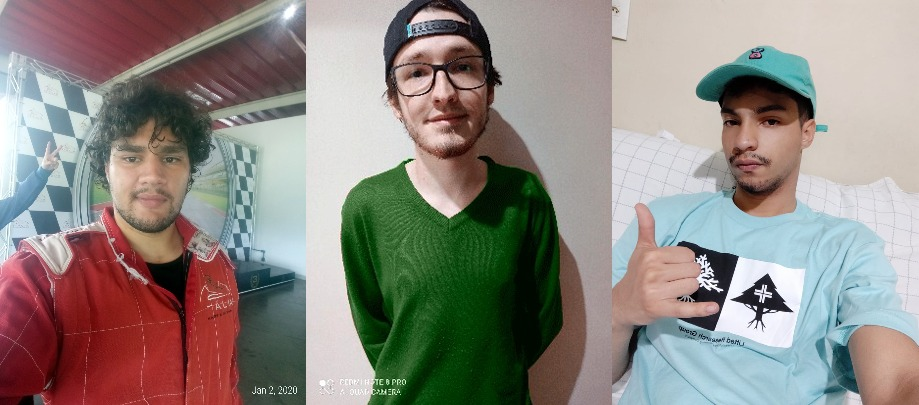


50% tem: 185900 pixels


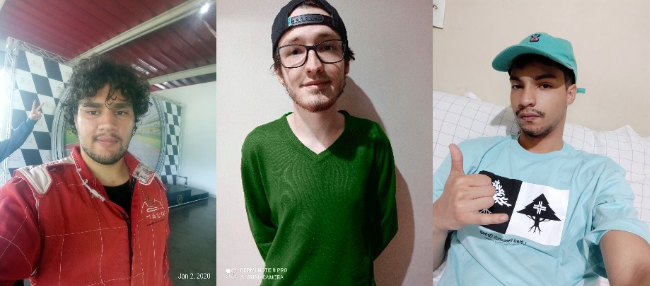


10% tem: 37248 pixels


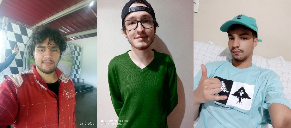

In [13]:
imgIntegrante = openImageCv('grupo-rgb.jpg')
originalX, originalY, colors = imgIntegrante.shape

print('A imagem original tem: ' + str(originalX * originalY) + ' pixels')
cv2_imshow(imgIntegrante)

# show 50% 
img2 = resizeImage(imgIntegrante, 0.5)
halfX, halfY, colors = img2.shape
print('\n50% tem: ' + str(halfX * halfY) + ' pixels')
cv2_imshow(img2)

# show 10% 
img3 = resizeImage(imgIntegrante, 0.1)
decX, decY, colors = img3.shape
print('\n10% tem: ' + str(decX * decY) + ' pixels')
cv2_imshow(img3)

A imagem original tem: 260712 pixels


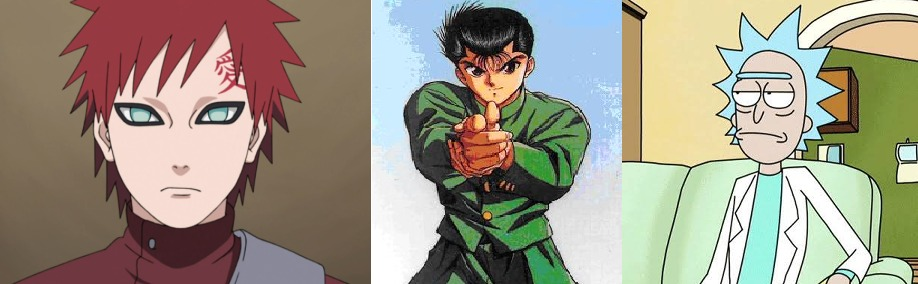


50% tem: 130449 pixels


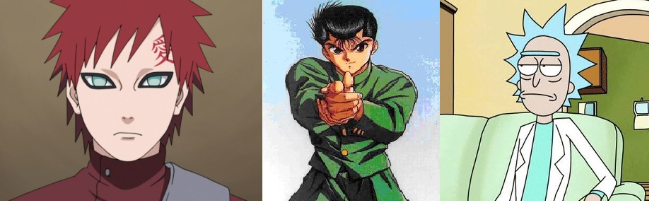


10% tem: 26100 pixels


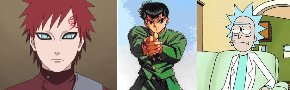

In [14]:
imgAvatar = openImageCv('grupo-avatar-rgb.jpg')
originalX, originalY, colors = imgAvatar.shape

print('A imagem original tem: ' + str(originalX * originalY) + ' pixels')
cv2_imshow(imgAvatar)

# show 50% 
img2 = resizeImage(imgAvatar, 0.5)
halfX, halfY, colors = img2.shape
print('\n50% tem: ' + str(halfX * halfY) + ' pixels')
cv2_imshow(img2)

# show 10% 
img3 = resizeImage(imgAvatar, 0.1)
decX, decY, colors = img3.shape
print('\n10% tem: ' + str(decX * decY) + ' pixels')
cv2_imshow(img3)

**a) Apresentem os vídeos com mudança de resolução, 25% e 50% dos originais;**



A  função getSize tem como primeiro parâmetro um video e segundo o fator a ser aplicado na resolução do mesmo.
Ela lẽ o primeiro frame, aplica o fator de resolução e retorna a qauntidade de pixeis de nos eixos y e x.

In [15]:
def getSize(video, factor):
  while True:
    # Lê um frame
    ret, frame = video.read()
    # redimenciona o frame
    frameResized = resizeImage(frame, factor)
    # extrai as propriedades dessa imagem
    sizeFrameX , sizeFrameY, colors = frameResized.shape
    
    # retorna os tamanho em y e em z
    return (sizeFrameY , sizeFrameX)
    break

A funçao processVideo recebe como parâmetros:

1.   caminho do video de entrada.
2.   caminho da saída.
3.   fator de redimencionamento.
4.   frame por segundo (fps) do video de saída.

Ela percorre frame à frame do vido de entrada, redimenciona cada frame e compõem um vido que é salvo no caminho de saída.

In [16]:
def processVideo (pathInput, pathOutput, factor, fps):
  # carrega o video de acordo com o caminho passado
  video = cv.VideoCapture(pathInput)
  
  # busca a resolução que será gravado o video de saída
  size = getSize(video, factor)

  # devide o coder-decoder (o único formato que foi possivel ser lido nos browser foi o .webm, por uso usamos o vp80)
  fourcc = cv.VideoWriter_fourcc(*'VP80')
  # define um objeto de saída
  out = cv.VideoWriter(pathOutput, cv.CAP_FFMPEG, fourcc, fps, size)

  while (video.isOpened()):
    # lê o frame
    ret, frame = video.read()
    if ret == True:
      # redimenciona o frame
      newResizeded = cv.resize(frame, size)
      # grava o novo frame na saída
      out.write(newResizeded)
    else:
      break

  video.release()
  out.release()



Processa os videos (rapido e lento), e cria novos videos com diferentes resoluçoes.

In [24]:
# caminho do vídeo rapido original
videoRapidoPath = pathOrigin + 'video_rapido_original.mp4'

# caminhos dos vídeos rápido com resolução alterada
pathOutput_rapido_1 = pathOrigin + 'video_rapido_resolucao_1.webm'
pathOutput_rapido_25 = pathOrigin + 'video_rapido_resolucao_25.webm'
pathOutput_rapido_50 = pathOrigin + 'video_rapido_resolucao_5.webm'
pathOutput_rapido_100 = pathOrigin + 'video_rapido_resolucao_100.webm'

# processamentos dos vídeos rápidos
processVideo(videoRapidoPath, pathOutput_rapido_1, 0.01, 60)
processVideo(videoRapidoPath, pathOutput_rapido_25, 0.25, 60)
processVideo(videoRapidoPath, pathOutput_rapido_50, 0.5, 60)
processVideo(videoRapidoPath, pathOutput_rapido_100, 1, 60)

# caminho do vídeo lento original
videoLentoPath = pathOrigin + 'video_lento_original.mp4'

# caminhos dos vídeos lento com resolução alterada
pathOutput_lento_1 = pathOrigin + 'video_lento_resolucao_1.webm'
pathOutput_lento_25 = pathOrigin + 'video_lento_resolucao_25.webm'
pathOutput_lento_50 = pathOrigin + 'video_lento_resolucao_5.webm'
pathOutput_lento_100 = pathOrigin + 'video_lento_resolucao_100.webm'

# processamentos dos vídeos lentos
processVideo(videoLentoPath, pathOutput_lento_1, 0.01, 30)
processVideo(videoLentoPath, pathOutput_lento_25, 0.25, 30)
processVideo(videoLentoPath, pathOutput_lento_50, 0.5, 30)
processVideo(videoLentoPath, pathOutput_lento_100, 1, 30)



Exibição dos videos

In [32]:
# lê os vídeos
video_rapido = open(videoRapidoPath,'rb').read()
video_rapido_1 = open(pathOutput_rapido_1,'rb').read()
video_rapido_25 = open(pathOutput_rapido_25,'rb').read()
video_rapido_50 = open(pathOutput_rapido_50,'rb').read()
video_rapido_100 = open(pathOutput_rapido_100,'rb').read()
video_lento = open(videoLentoPath,'rb').read()
video_lento_1 = open(pathOutput_lento_1,'rb').read()
video_lento_25 = open(pathOutput_lento_25,'rb').read()
video_lento_50 = open(pathOutput_lento_50,'rb').read()
video_lento_100 = open(pathOutput_lento_100,'rb').read()

# Decodifica conteúdo dos vídeo
videoDecoded_rapido = "data:video/mp4;base64," + b64encode(video_rapido).decode()
videoDecoded_rapido_1 = "data:video/mp4;base64," + b64encode(video_rapido_1).decode()
videoDecoded_rapido_25 = "data:video/mp4;base64," + b64encode(video_rapido_25).decode()
videoDecoded_rapido_50 = "data:video/mp4;base64," + b64encode(video_rapido_50).decode()
videoDecoded_rapido_100 = "data:video/mp4;base64," + b64encode(video_rapido_100).decode()

# Decodifica conteúdo dos vídeo
videoDecoded_lento = "data:video/mp4;base64," + b64encode(video_lento).decode()
videoDecoded_lento_1 = "data:video/mp4;base64," + b64encode(video_lento_1).decode()
videoDecoded_lento_25 = "data:video/mp4;base64," + b64encode(video_lento_25).decode()
videoDecoded_lento_50 = "data:video/mp4;base64," + b64encode(video_lento_50).decode()
videoDecoded_lento_100 = "data:video/mp4;base64," + b64encode(video_lento_100).decode()



In [30]:
# Exibe Vídeo rápido original 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_rapido} type="video/mp4">')

In [35]:
# Exibe Vídeo rápido resolução 100% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_rapido_100} type="video/webm">')

Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Exibe Vídeo rápido resolução 50% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_rapido_50} type="video/webm">')

Output hidden; open in https://colab.research.google.com to view.

In [37]:
# Exibe Vídeo rápido resolução 25% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_rapido_25} type="video/webm">')

Output hidden; open in https://colab.research.google.com to view.

In [38]:
# Exibe Vídeo rápido resolução 1% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_rapido_1} type="video/webm">')

In [39]:
# Exibe Vídeo lento original 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_lento} type="video/mp4">')

In [43]:
# Exibe Vídeo lento resolução 100% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_lento_100} type="video/webm">')

In [42]:
# Exibe Vídeo lento resolução 50% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_lento_50} type="video/webm">')

In [41]:
# Exibe Vídeo lento resolução 25% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_lento_25} type="video/webm">')

In [40]:
# Exibe Vídeo lento resolução 1% 
HTML(f'<video width={320} height={240} controls><source src= {videoDecoded_lento_1} type="video/webm">')